In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import argparse
import os
#from dataset import get_loader
from solver import Solver
import glob
from torchvision import transforms, utils
import torchvision.transforms as standard_transforms

from torch.utils.data import Dataset, DataLoader
from own_dataloader import Rescale
from own_dataloader import RescaleT
from own_dataloader import RandomCrop
from own_dataloader import CenterCrop
from own_dataloader import ToTensor
from own_dataloader import ToTensorLab
from own_dataloader import SalObjDataset

In [3]:
data_dir =   'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/Saliency_Dataset2/dataset_test/DUTOMRON/'

test_image_dir = 'image/'
test_label_dir = 'gt/'
enableInpaintAug = False
batch_size_train=32
batch_size_val=1
image_ext = '.jpg'
label_ext = '.png'
output_path = 'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/Experiment 1 DUTOMRON Predicted Map/'

In [4]:
def main(config):

    test_img_name_list = glob.glob(data_dir + test_image_dir + '*' + image_ext)
    print("data_dir + test_image_dir + '*' + image_ext: ", data_dir + test_image_dir + '*' + image_ext)

    test_lbl_name_list = []
    for img_path in test_img_name_list:
    	img_name = img_path.split("\\")[-1]
    	aaa = img_name.split(".")
    	bbb = aaa[0:-1]
    	imidx = bbb[0]
    	for i in range(1,len(bbb)):
    		imidx = imidx + "." + bbb[i]
    	test_lbl_name_list.append(data_dir + test_label_dir + imidx + label_ext)

    print("---")
    print("test images: ", len(test_img_name_list))
    print("test labels: ", len(test_lbl_name_list))
    print("---")

    test_num = len(test_img_name_list)

    salobj_dataset_test = SalObjDataset(
        img_name_list=test_img_name_list,
        lbl_name_list=test_lbl_name_list,
        transform=transforms.Compose([
            RescaleT(256),
            RandomCrop(224),
            ToTensorLab(flag=0)]),
    		category="test",
    		enableInpaintAug=enableInpaintAug)
            

    test_loader = DataLoader(salobj_dataset_test, batch_size=batch_size_val, shuffle=True, num_workers=1)
    if not os.path.exists(config.test_fold): os.mkdir(config.test_fold)
    test = Solver(None, None, test_loader, config)
    test.test(100,output_path, use_crf=config.use_crf)

data_dir + test_image_dir + '*' + image_ext:  C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/Saliency_Dataset2/dataset_test/DUTOMRON/image/*.jpg
---
test images:  5166
test labels:  5166
---


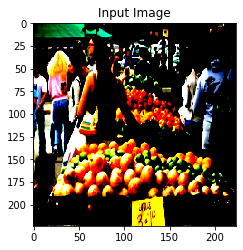

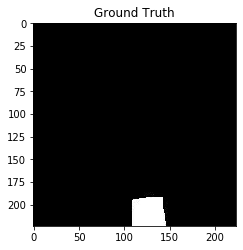

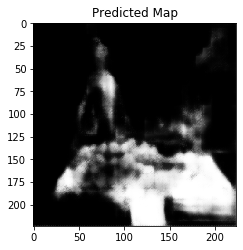

100
[0] mae: 0.1748


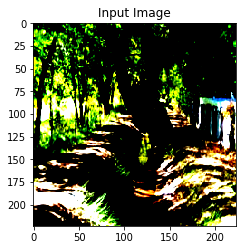

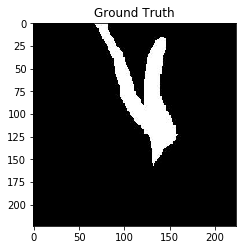

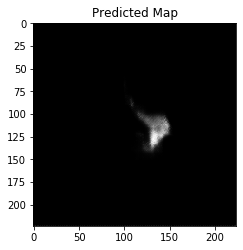

100
[1] mae: 0.0817


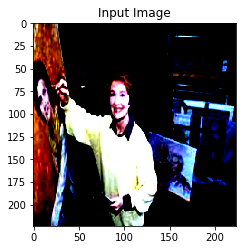

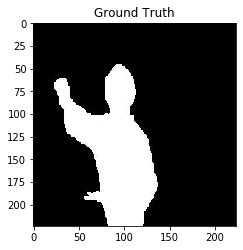

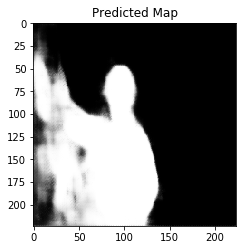

100
[2] mae: 0.1586


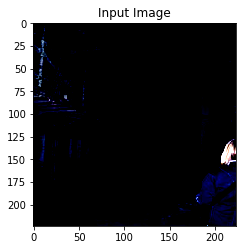

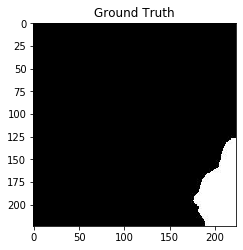

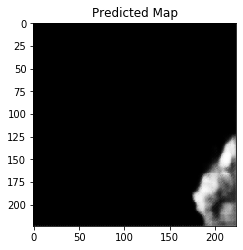

100
[3] mae: 0.0285


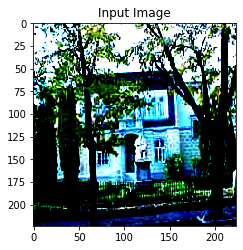

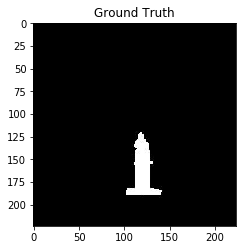

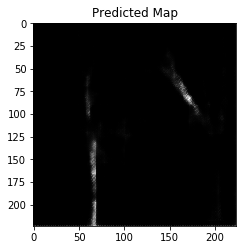

100
[4] mae: 0.0280


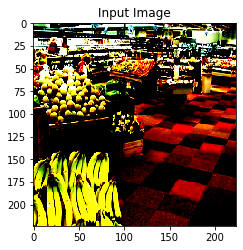

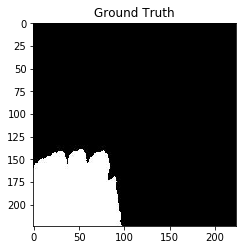

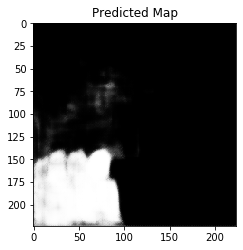

100
[5] mae: 0.0197


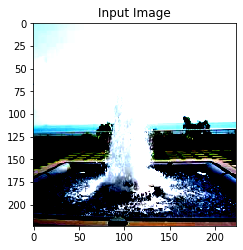

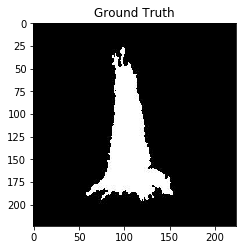

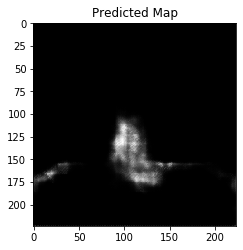

100
[6] mae: 0.1054


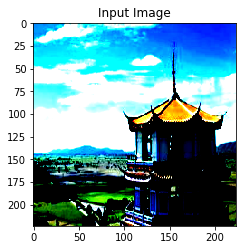

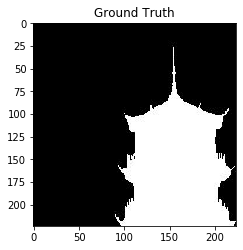

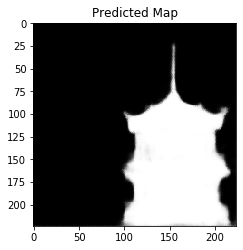

100
[7] mae: 0.0181


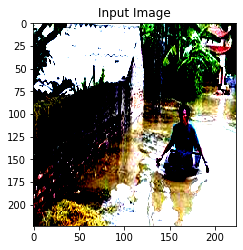

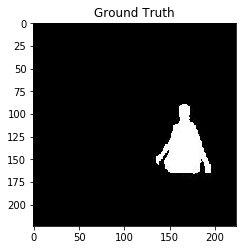

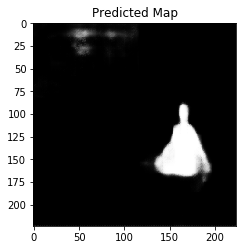

100
[8] mae: 0.0174


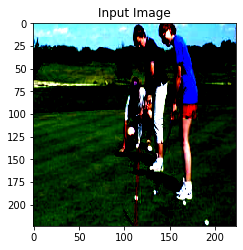

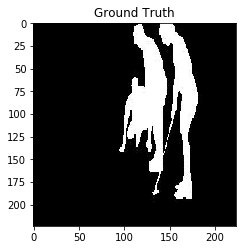

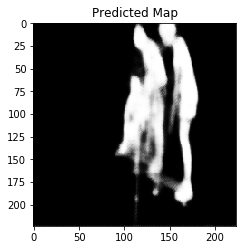

100
[9] mae: 0.0446


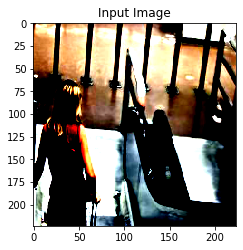

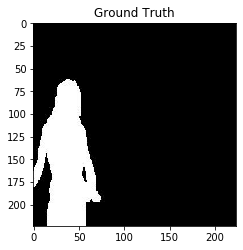

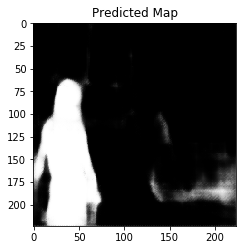

100
[10] mae: 0.0332


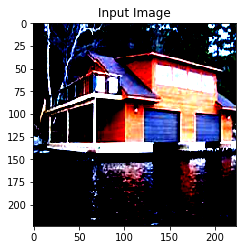

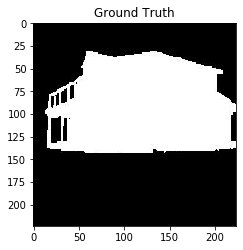

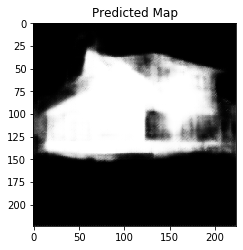

100
[11] mae: 0.0994


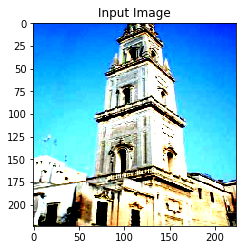

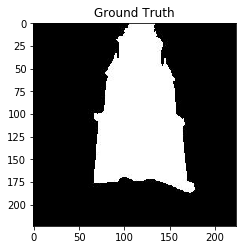

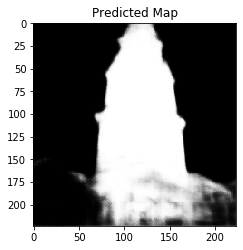

100
[12] mae: 0.1092


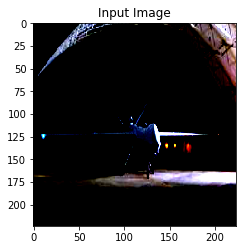

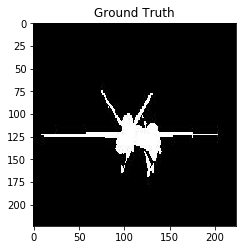

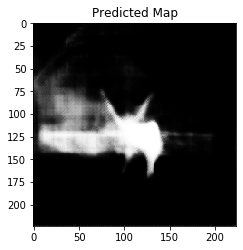

100
[13] mae: 0.0819


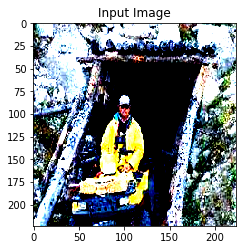

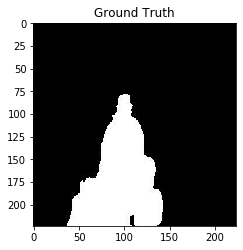

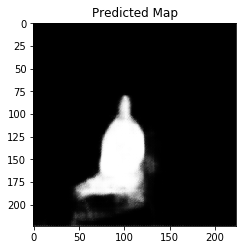

100
[14] mae: 0.0847


In [ ]:
if __name__ == '__main__':
    data_root = os.path.join(os.path.expanduser('~'), 'data')
    vgg_path = 'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/project_weights/vgg16_feat.pth'


    parser = argparse.ArgumentParser()

    # Hyper-parameters
    parser.add_argument('--n_color', type=int, default=3)
    parser.add_argument('--img_size', type=int, default=256)  # 256
    parser.add_argument('--lr', type=float, default=1e-6)
    parser.add_argument('--clip_gradient', type=float, default=1.0)
    parser.add_argument('--cuda', type=bool, default=False)

    # Training settings
    parser.add_argument('--vgg', type=str, default=vgg_path)
    parser.add_argument('--epoch', type=int, default=500)
    parser.add_argument('--val', type=bool, default=True)

    parser.add_argument('--num_thread', type=int, default=4)
    parser.add_argument('--load', type=str, default='')
    parser.add_argument('--save_fold', type=str, default='./results')
    parser.add_argument('--epoch_val', type=int, default=10)
    parser.add_argument('--batch_size', type=int, default=batch_size_train)
    parser.add_argument('--batch_size_val', type=int, default=batch_size_val)
    parser.add_argument('--epoch_save', type=int, default=10)
    parser.add_argument('--epoch_show', type=int, default=1)
    parser.add_argument('--pre_trained', type=str, default=None)

    # Testing settings
    parser.add_argument('--model', type=str, default='./weights/final.pth')
    parser.add_argument('--test_fold', type=str, default='./results/test')
    parser.add_argument('--use_crf', type=bool, default=False)

    # Misc
    parser.add_argument('--mode', type=str, default='train', choices=['train', 'test'])
    parser.add_argument('--visdom', type=bool, default=False)
    
    import easydict
    
    config =  easydict.EasyDict({
    
    "n_color": 3,
    "img_size":256,
    "lr":1e-6,
    "clip_gradient":1.0,
    "cuda":False,

    "vgg":vgg_path,
    "epoch":500,
    "val":True,
        
    "num_thread":4,
    "load":'',
    "save_fold":'./results',
    "epoch_val":10,
    "batch_size":batch_size_train,
    "batch_size_val":batch_size_val,
    "epoch_save":10,
    "epoch_show":1,
    "pre_trained":None,

    "model":'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/project_weights/Experiment1.pth',
    "test_fold":'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/project_weights/training_result',
    "use_crf":False,

    "mode":'test',
    "visdom":False,
})
    if not os.path.exists(config.save_fold): os.mkdir(config.save_fold)
    main(config)
    
    